In [25]:
import json
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [57]:
vocab_size = 1000
embedding_dim = 32
max_length = 16
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_size = 20000

In [58]:
datastore = []
for line in open('Data/Sarcasm_Headlines_Dataset.json', 'r'):
    datastore.append(json.loads(line))

sentences = []
labels = []
urls = []

for items in datastore:
    sentences.append(items['headline'])
    labels.append(items['is_sarcastic'])

In [59]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = np.array(labels[0:training_size])
testing_labels = np.array(labels[training_size:])

In [60]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, truncating=trunc_type, maxlen=max_length, padding=padding_type)

testing_sentences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sentences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [61]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 16, 32)            32000     
_________________________________________________________________
global_average_pooling1d_3 ( (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 24)                792       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 25        
Total params: 32,817
Trainable params: 32,817
Non-trainable params: 0
_________________________________________________________________


In [62]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, 
                    validation_data=(testing_padded, testing_labels), verbose=2)

Train on 20000 samples, validate on 8619 samples
Epoch 1/30
20000/20000 - 1s - loss: 0.5042 - accuracy: 0.7509 - val_loss: 0.4015 - val_accuracy: 0.8129
Epoch 2/30
20000/20000 - 1s - loss: 0.3829 - accuracy: 0.8252 - val_loss: 0.3882 - val_accuracy: 0.8234
Epoch 3/30
20000/20000 - 1s - loss: 0.3701 - accuracy: 0.8304 - val_loss: 0.3954 - val_accuracy: 0.8198
Epoch 4/30
20000/20000 - 1s - loss: 0.3662 - accuracy: 0.8320 - val_loss: 0.3907 - val_accuracy: 0.8205
Epoch 5/30
20000/20000 - 1s - loss: 0.3642 - accuracy: 0.8331 - val_loss: 0.3926 - val_accuracy: 0.8153
Epoch 6/30
20000/20000 - 1s - loss: 0.3623 - accuracy: 0.8329 - val_loss: 0.3910 - val_accuracy: 0.8192
Epoch 7/30
20000/20000 - 1s - loss: 0.3608 - accuracy: 0.8339 - val_loss: 0.3923 - val_accuracy: 0.8175
Epoch 8/30
20000/20000 - 1s - loss: 0.3593 - accuracy: 0.8363 - val_loss: 0.3909 - val_accuracy: 0.8196
Epoch 9/30
20000/20000 - 1s - loss: 0.3567 - accuracy: 0.8375 - val_loss: 0.3866 - val_accuracy: 0.8221
Epoch 10/30
200

In [63]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

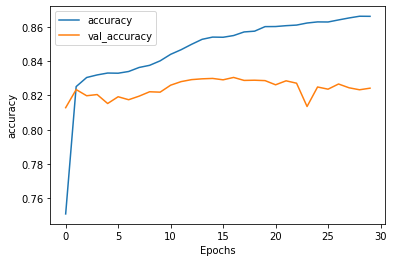

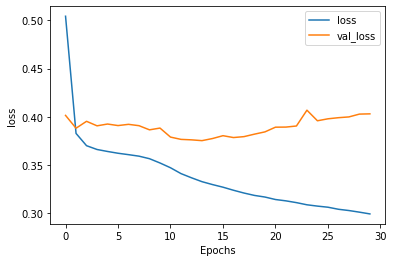

In [64]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [65]:
#https://www.tensorflow.org/datasets/api_docs/python/tfds/features/text/SubwordTextEncoder

In [66]:
info.features['text']

NameError: name 'info' is not defined